In [1]:
#importing the require function
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# Load the dataset
file_path = r"https://raw.githubusercontent.com/ihsazal/EDGE/refs/heads/main/matches.csv"
df = pd.read_csv(file_path)




In [3]:
#Checking Dataset head and tail info
print(df.head())
print(df.tail())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [5]:
#Checking Dataset Details
print(df.info())
print("\nShape of Dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
# Check for missing values before cleaning
missing_values=df.isnull().sum()
print(f'Missing Values: \n',missing_values)
Total_missing_values=df.isnull().sum().sum()
print(f'Total Missing Values: ',Total_missing_values)

Missing Values: 
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
Total Missing Values:  656


In [9]:
df[df['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [11]:
#Handling Missing Values
df.loc[(df['venue']== 'Dubai International Cricket Stadium'),['city']] = 'Dubai'

In [13]:
df['winner']=df['winner'].fillna('NoResult')

In [15]:
df['player_of_match']=df['player_of_match'].fillna('NoResult')

In [17]:
df['umpire1']=df['umpire1'].fillna('unknown')
df['umpire2']=df['umpire2'].fillna('unknown')

In [19]:
#droping the third umpire(umpire3) column as alomost more than 80% of the data is missing. Also it won't have effect on the data
df.drop(columns=['umpire3'], inplace=True)

In [21]:
# Check for missing values after cleaning
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [23]:
# Descriptive Statistics
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [25]:
# Mean, median, mode, standard deviation
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]
std_dev = df.std(numeric_only=True)

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev)

Mean:
 id                1792.178571
season            2013.444444
dl_applied           0.025132
win_by_runs         13.283069
win_by_wickets       3.350529
dtype: float64

Median:
 id                 378.5
season            2013.0
dl_applied           0.0
win_by_runs          0.0
win_by_wickets       4.0
dtype: float64

Mode:
 id                                     1
season                            2013.0
city                              Mumbai
date                            04/05/19
team1                     Mumbai Indians
team2              Kolkata Knight Riders
toss_winner               Mumbai Indians
toss_decision                      field
result                            normal
dl_applied                           0.0
winner                    Mumbai Indians
win_by_runs                          0.0
win_by_wickets                       0.0
player_of_match                 CH Gayle
venue                       Eden Gardens
umpire1                  HDPK Dharmasena
umpire2       

toss_decision
field    463
bat      293
Name: count, dtype: int64


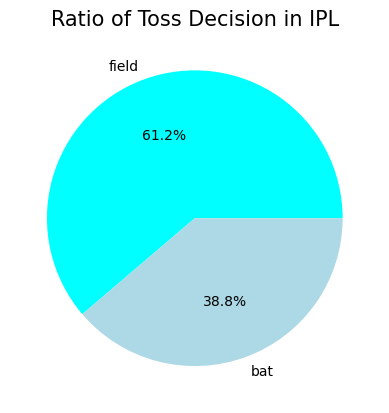

In [27]:
#Showing the toss decision in pie chart
toss_decision_ratio = df['toss_decision'].value_counts()
print(toss_decision_ratio)
labels = ['field','bat']
x = (toss_decision_ratio / toss_decision_ratio.sum()) * 100
colors = ['cyan', 'lightblue']
plt.pie(x, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Ratio of Toss Decision in IPL", fontsize=15)
plt.show()

True     393
False    363
Name: count, dtype: int64


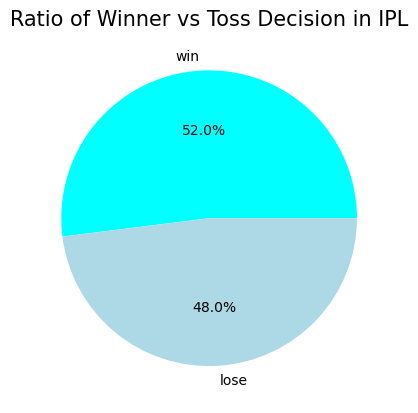

In [29]:
#Showing if winning toss has any effect on winning the match
tosswin_matchwin_ratio=(df['toss_winner']==df['winner']).value_counts()
print(tosswin_matchwin_ratio)
labels = ['win','lose']
x = (tosswin_matchwin_ratio / tosswin_matchwin_ratio.sum()) * 100
colors = ['cyan', 'lightblue']
plt.pie(x, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Ratio of Winner vs Toss Decision in IPL", fontsize=15)
plt.show()


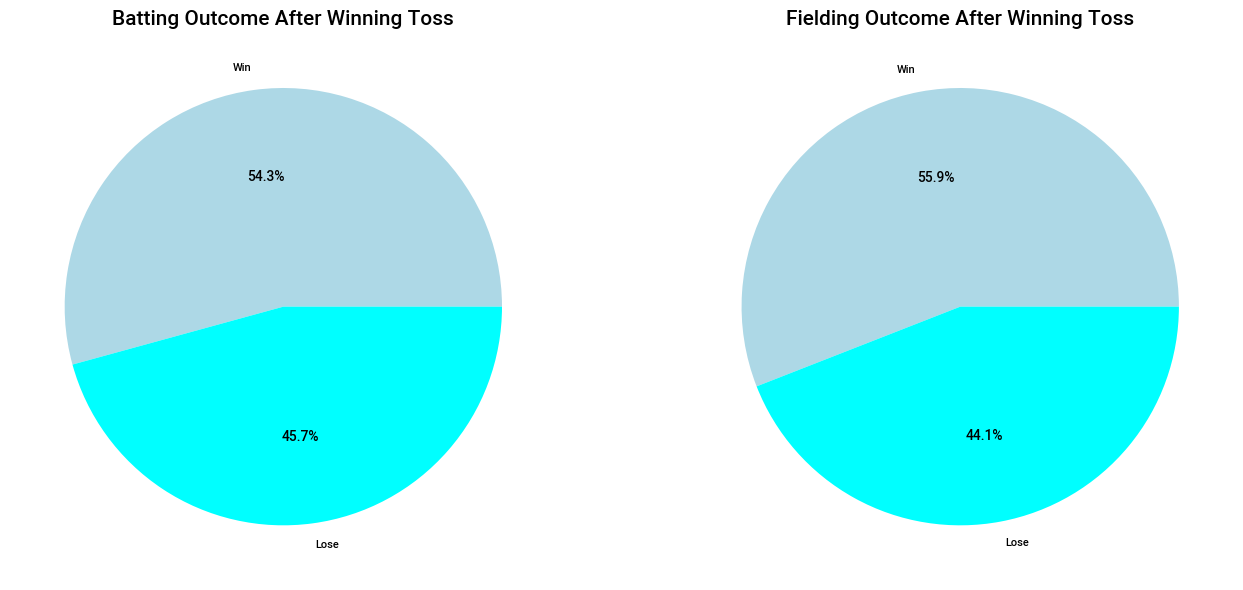

In [109]:
#Showing if choosing batting or fielding have any effect on winning the match
batting_outcome = (df[df['toss_decision'] == 'bat']['toss_winner'] == df[df['toss_decision'] == 'bat']['winner']).value_counts()
fielding_outcome = (df[df['toss_decision'] == 'field']['toss_winner'] == df[df['toss_decision'] == 'field']['winner']).value_counts()


batting_percentage = (batting_outcome / batting_outcome.sum()) * 100
fielding_percentage = (fielding_outcome / fielding_outcome.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(batting_percentage, labels=['Win', 'Lose'], colors=['lightblue', 'cyan'], autopct='%1.1f%%')
axes[0].set_title("Batting Outcome After Winning Toss", fontsize=15)

axes[1].pie(fielding_percentage, labels=['Win', 'Lose'], colors=['lightblue', 'cyan'], autopct='%1.1f%%')
axes[1].set_title("Fielding Outcome After Winning Toss", fontsize=15)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


AttributeError: Rectangle.set() got an unexpected keyword argument 'xlabel'

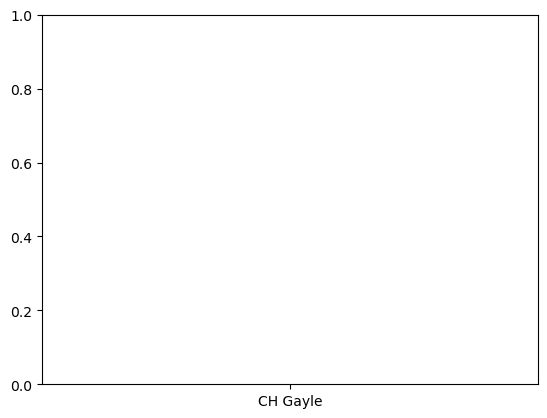

In [53]:
MOM = df['player_of_match'].value_counts()
#print(MOM)
top_10_MOM=MOM.head(10)
print(top_10_MOM)
plt.bar(top_10_MOM.index, top_10_MOM.values,xlabel='Player',ylabel='Number of MOM awards',title='Top 10 players with the most MOM awards')
plt.show

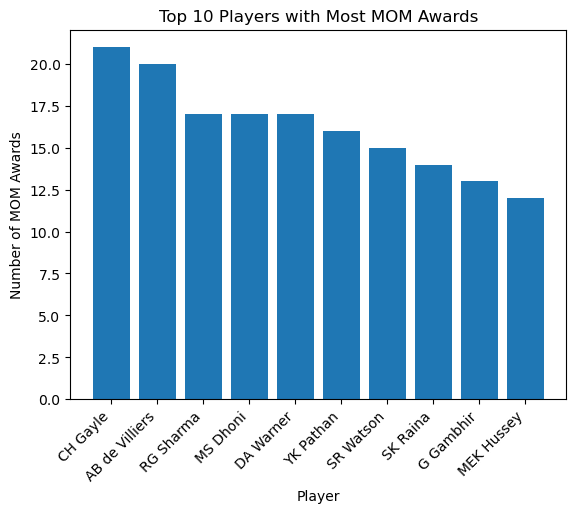

In [47]:
# Count the occurrences of 'player_of_match'
MOM = df['player_of_match'].value_counts()

# Get the top 10 players
top_10_MOM = MOM.head(10)

# Create the bar plot
plt.bar(top_10_MOM.index, top_10_MOM.values)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of MOM Awards')
plt.title('Top 10 Players with Most MOM Awards')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
#plt.tight_layout()  # Adjusts the plot to ensure everything fits
plt.show()

In [103]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html(r"C:\Users\pc\.cache\kagglehub\datasets\nowke9\ipldata\versions\2\matches.html")

                                             |          | [  0%]   00:00 -> (? left)

Report C:\Users\pc\.cache\kagglehub\datasets\nowke9\ipldata\versions\2\matches.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
